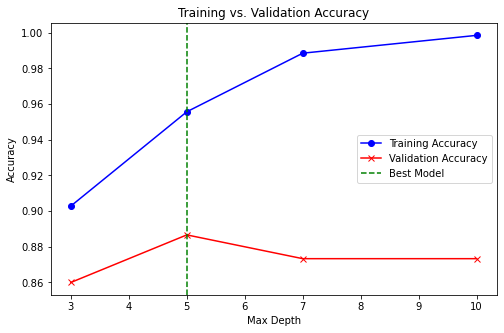

Best Validation Accuracy: 0.8867
Test Accuracy using Best Model: 0.8533


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Create multiple candidate models with different max depths
depths = [3, 5, 7, 10]  # Trying different tree depths
train_accuracies = []
val_accuracies = []
best_model = None
best_val_accuracy = -float('inf')

# Step 4: Train and evaluate models
for depth in depths:
    # Initialize the Decision Tree with max depth
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the model
    dt_clf.fit(X_train, y_train)
    
    # Evaluate the model on training and validation sets
    train_accuracy = accuracy_score(y_train, dt_clf.predict(X_train))
    val_accuracy = accuracy_score(y_val, dt_clf.predict(X_val))
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    # Select the best model based on validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = dt_clf

# Step 5: Plot training vs. validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, label="Training Accuracy", color='blue', marker='o')
plt.plot(depths, val_accuracies, label="Validation Accuracy", color='red', marker='x')
plt.axvline(depths[np.argmax(val_accuracies)], linestyle="--", color="green", label="Best Model")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.show()

# Step 6: Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")
print(f"Test Accuracy using Best Model: {test_accuracy:.4f}")
